In [21]:

import pandas as pd

# Load the uploaded file
file_path = 'C:/Users/admin/Downloads/historical_automobile_sales.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


# Q_1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.

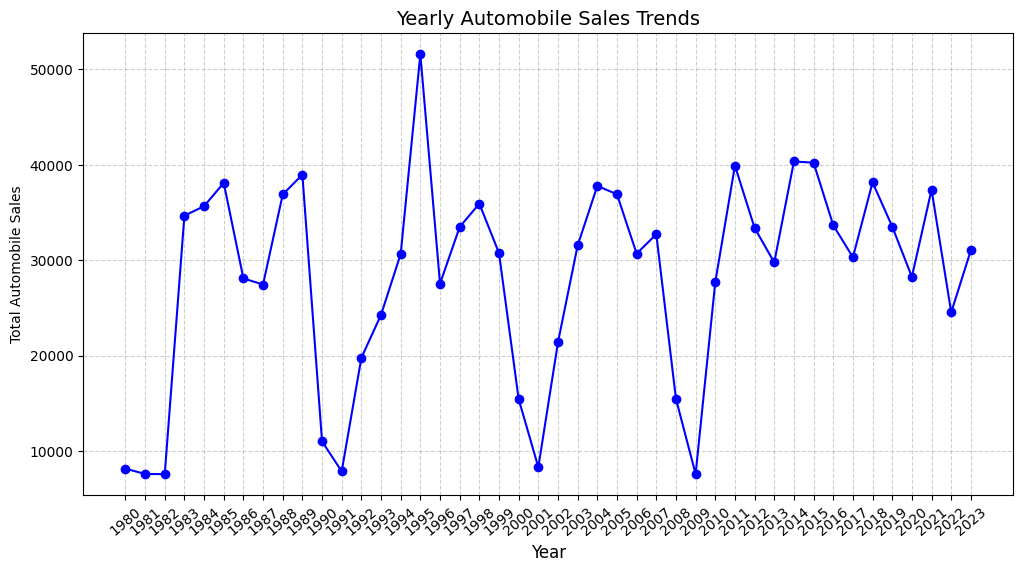

In [18]:
# Aggregate automobile sales by year
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum().reset_index()

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Automobile_Sales'], marker='o', linestyle='-', color='b')
plt.title('Yearly Automobile Sales Trends', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_sales['Year'], rotation=40)
plt.show()


# Q 2: Plot different lines for categories of vehicle type and analyze the

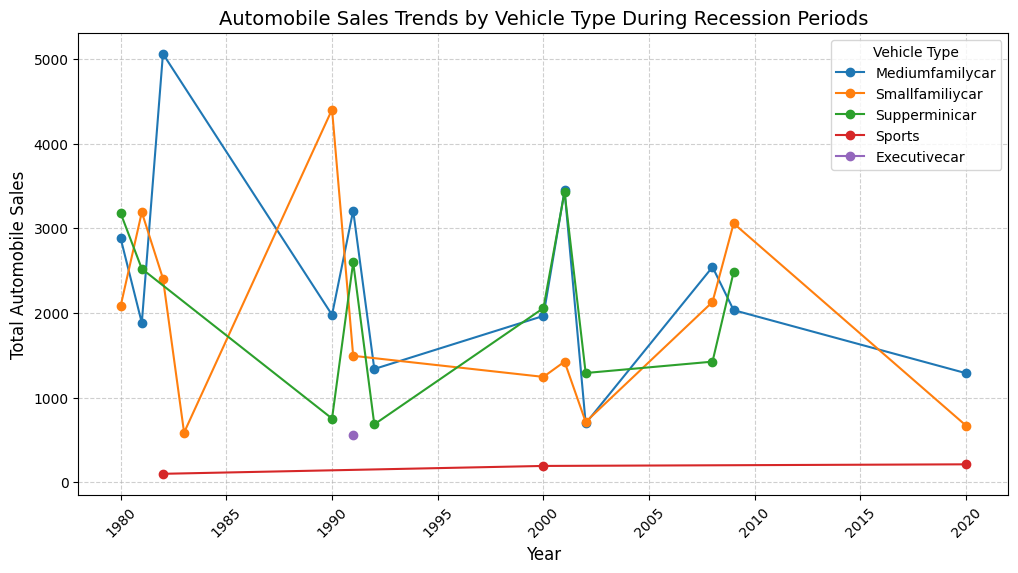

In [19]:

# trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods? 
# Analyze sales trends by vehicle type during recession periods
df_recession = df[df['Recession'] == 1]

# Aggregate sales by year and vehicle type during recession periods
sales_by_type_recession = df_recession.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# Plot the trends for each vehicle type
plt.figure(figsize=(12, 6))

for vehicle_type in sales_by_type_recession['Vehicle_Type'].unique():
    subset = sales_by_type_recession[sales_by_type_recession['Vehicle_Type'] == vehicle_type]
    plt.plot(subset['Year'], subset['Automobile_Sales'], marker='o', linestyle='-', label=vehicle_type)

plt.title('Automobile Sales Trends by Vehicle Type During Recession Periods', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=12)
plt.legend(title='Vehicle Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


# Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period. 


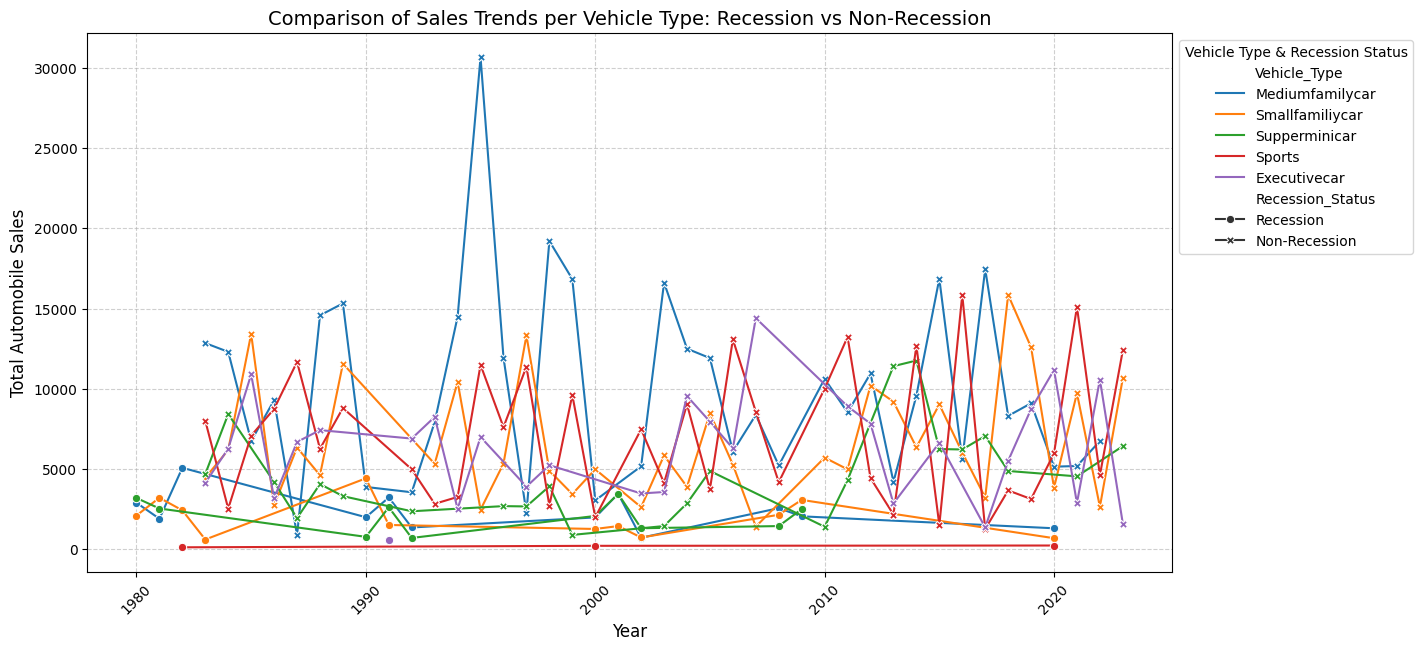

In [4]:


import seaborn as sns


# Load the data
file_path = 'C:/Users/admin/Downloads/historical_automobile_sales.csv'
df = pd.read_csv(file_path)

# Add a new column to distinguish recession vs. non-recession periods
df['Recession_Status'] = df['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

# Aggregate sales by year, vehicle type, and recession status
sales_comparison = df.groupby(['Year', 'Vehicle_Type', 'Recession_Status'])['Automobile_Sales'].sum().reset_index()

# Create a Seaborn line plot to compare recession vs. non-recession sales trends
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=sales_comparison, 
    x='Year', 
    y='Automobile_Sales', 
    hue='Vehicle_Type', 
    style='Recession_Status', 
    markers=True, 
    dashes=False
)

plt.title('Comparison of Sales Trends per Vehicle Type: Recession vs Non-Recession', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=12)
plt.legend(title='Vehicle Type & Recession Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()



# Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period

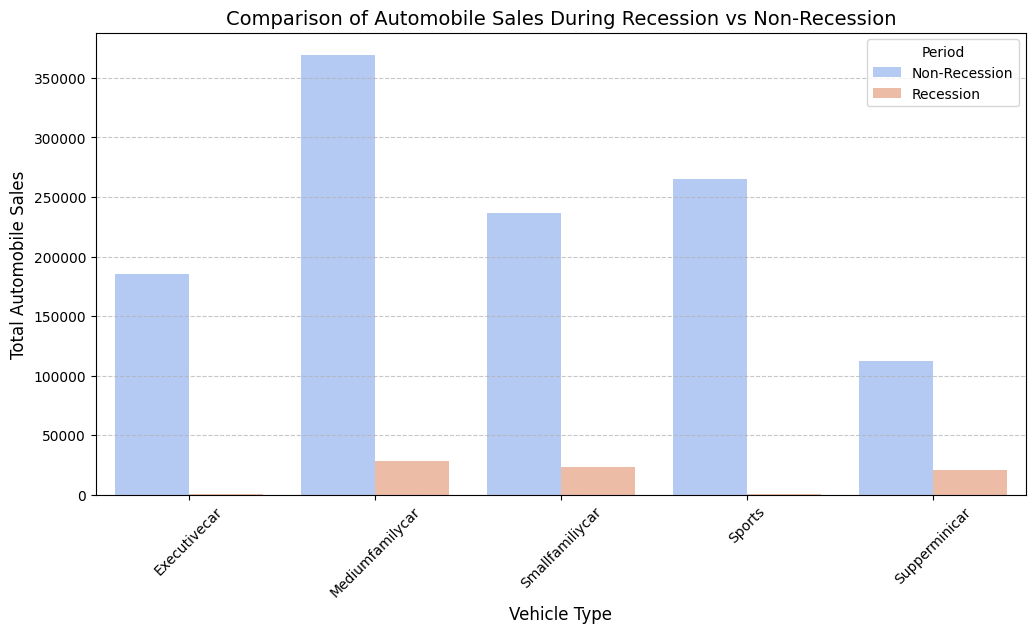

In [5]:
# Aggregate total sales by vehicle type for recession and non-recession periods
sales_comparison = df.groupby(['Vehicle_Type', 'Recession_Status'])['Automobile_Sales'].sum().reset_index()

# Create a bar plot to compare sales during recession vs non-recession
plt.figure(figsize=(12, 6))
sns.barplot(
    data=sales_comparison, 
    x='Vehicle_Type', 
    y='Automobile_Sales', 
    hue='Recession_Status', 
    palette='coolwarm'
)

plt.title('Comparison of Automobile Sales During Recession vs Non-Recession', fontsize=14)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Total Automobile Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
